In [38]:

# install dependencies and define constants and functions
import matplotlib.pyplot as plt
import os
import numpy as np

color = ['yellow', 'blue', 'green', 'orange', 'purple']


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


directory_name = globals()['_dh'][0]

# load position data from blender
blender_cone_path = os.path.join(directory_name, 'cone_position.p3d')
blender_cone_points_3D = np.loadtxt(blender_cone_path, delimiter=';')

# load car position data from blender
blender_car_path = os.path.join(directory_name, 'car_position.p3d')
blender_car_points_3D = np.loadtxt(blender_car_path, delimiter=';')

class Result:
    def __init__(self, directory_name, points_3D, optimization_errors, color):
        self.name = os.path.basename(directory_name)
        self.points_3D = np.insert(points_3D, 3, optimization_errors, axis=1)
        self.color = color


# load results
result_paths = sorted([os.path.join(directory_name, frame_dir)
                 for frame_dir in os.listdir(directory_name)])

# add cone position to results
blender_position_path = os.path.join(directory_name, 'blender-position')
cone_points_3D = np.loadtxt(os.path.join(
    blender_position_path, 'cone_transformation.p3d'), delimiter=';')
transformed_cone_points_2D = cone_points_3D[:, :2]

results = []
i = 0
for result_path in result_paths:
    # check if result is a directory
    if os.path.isdir(result_path):
        i += 1
        points_3D = np.loadtxt(os.path.join(
            result_path, 'car_transformation.p3d'), delimiter=';')
        error = np.loadtxt(os.path.join(
            result_path, 'optimization_errors.txt'), delimiter=';')
        result = Result(result_path, points_3D, error, color[i])
        results.append(Result(result_path, points_3D, error, color[i]))




In [39]:
# define plot
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200  # 200 e.g. is really fine, but slower
plt.rcParams['lines.markersize'] = 2

def plotTrack(results):
    for result in results:
        plt.plot(result.points_3D[:, 0], result.points_3D[:, 1],
                color=result.color, label=result.name)
        plt.legend(loc='best')
    # add "real position" to plot
    plt.plot(blender_car_points_3D[:, 0],
             blender_car_points_3D[:, 1], label='real position'.format('red'))
    plt.plot(blender_cone_points_3D[:, 0], blender_cone_points_3D[:, 1], 'r^')
    # add reconstucted cone points to plot
    plt.plot(transformed_cone_points_2D[:, 0],
             transformed_cone_points_2D[:, 1], 'y^')
    plt.ylabel("Y position", labelpad=15)
    plt.xlabel("X position", labelpad=15)


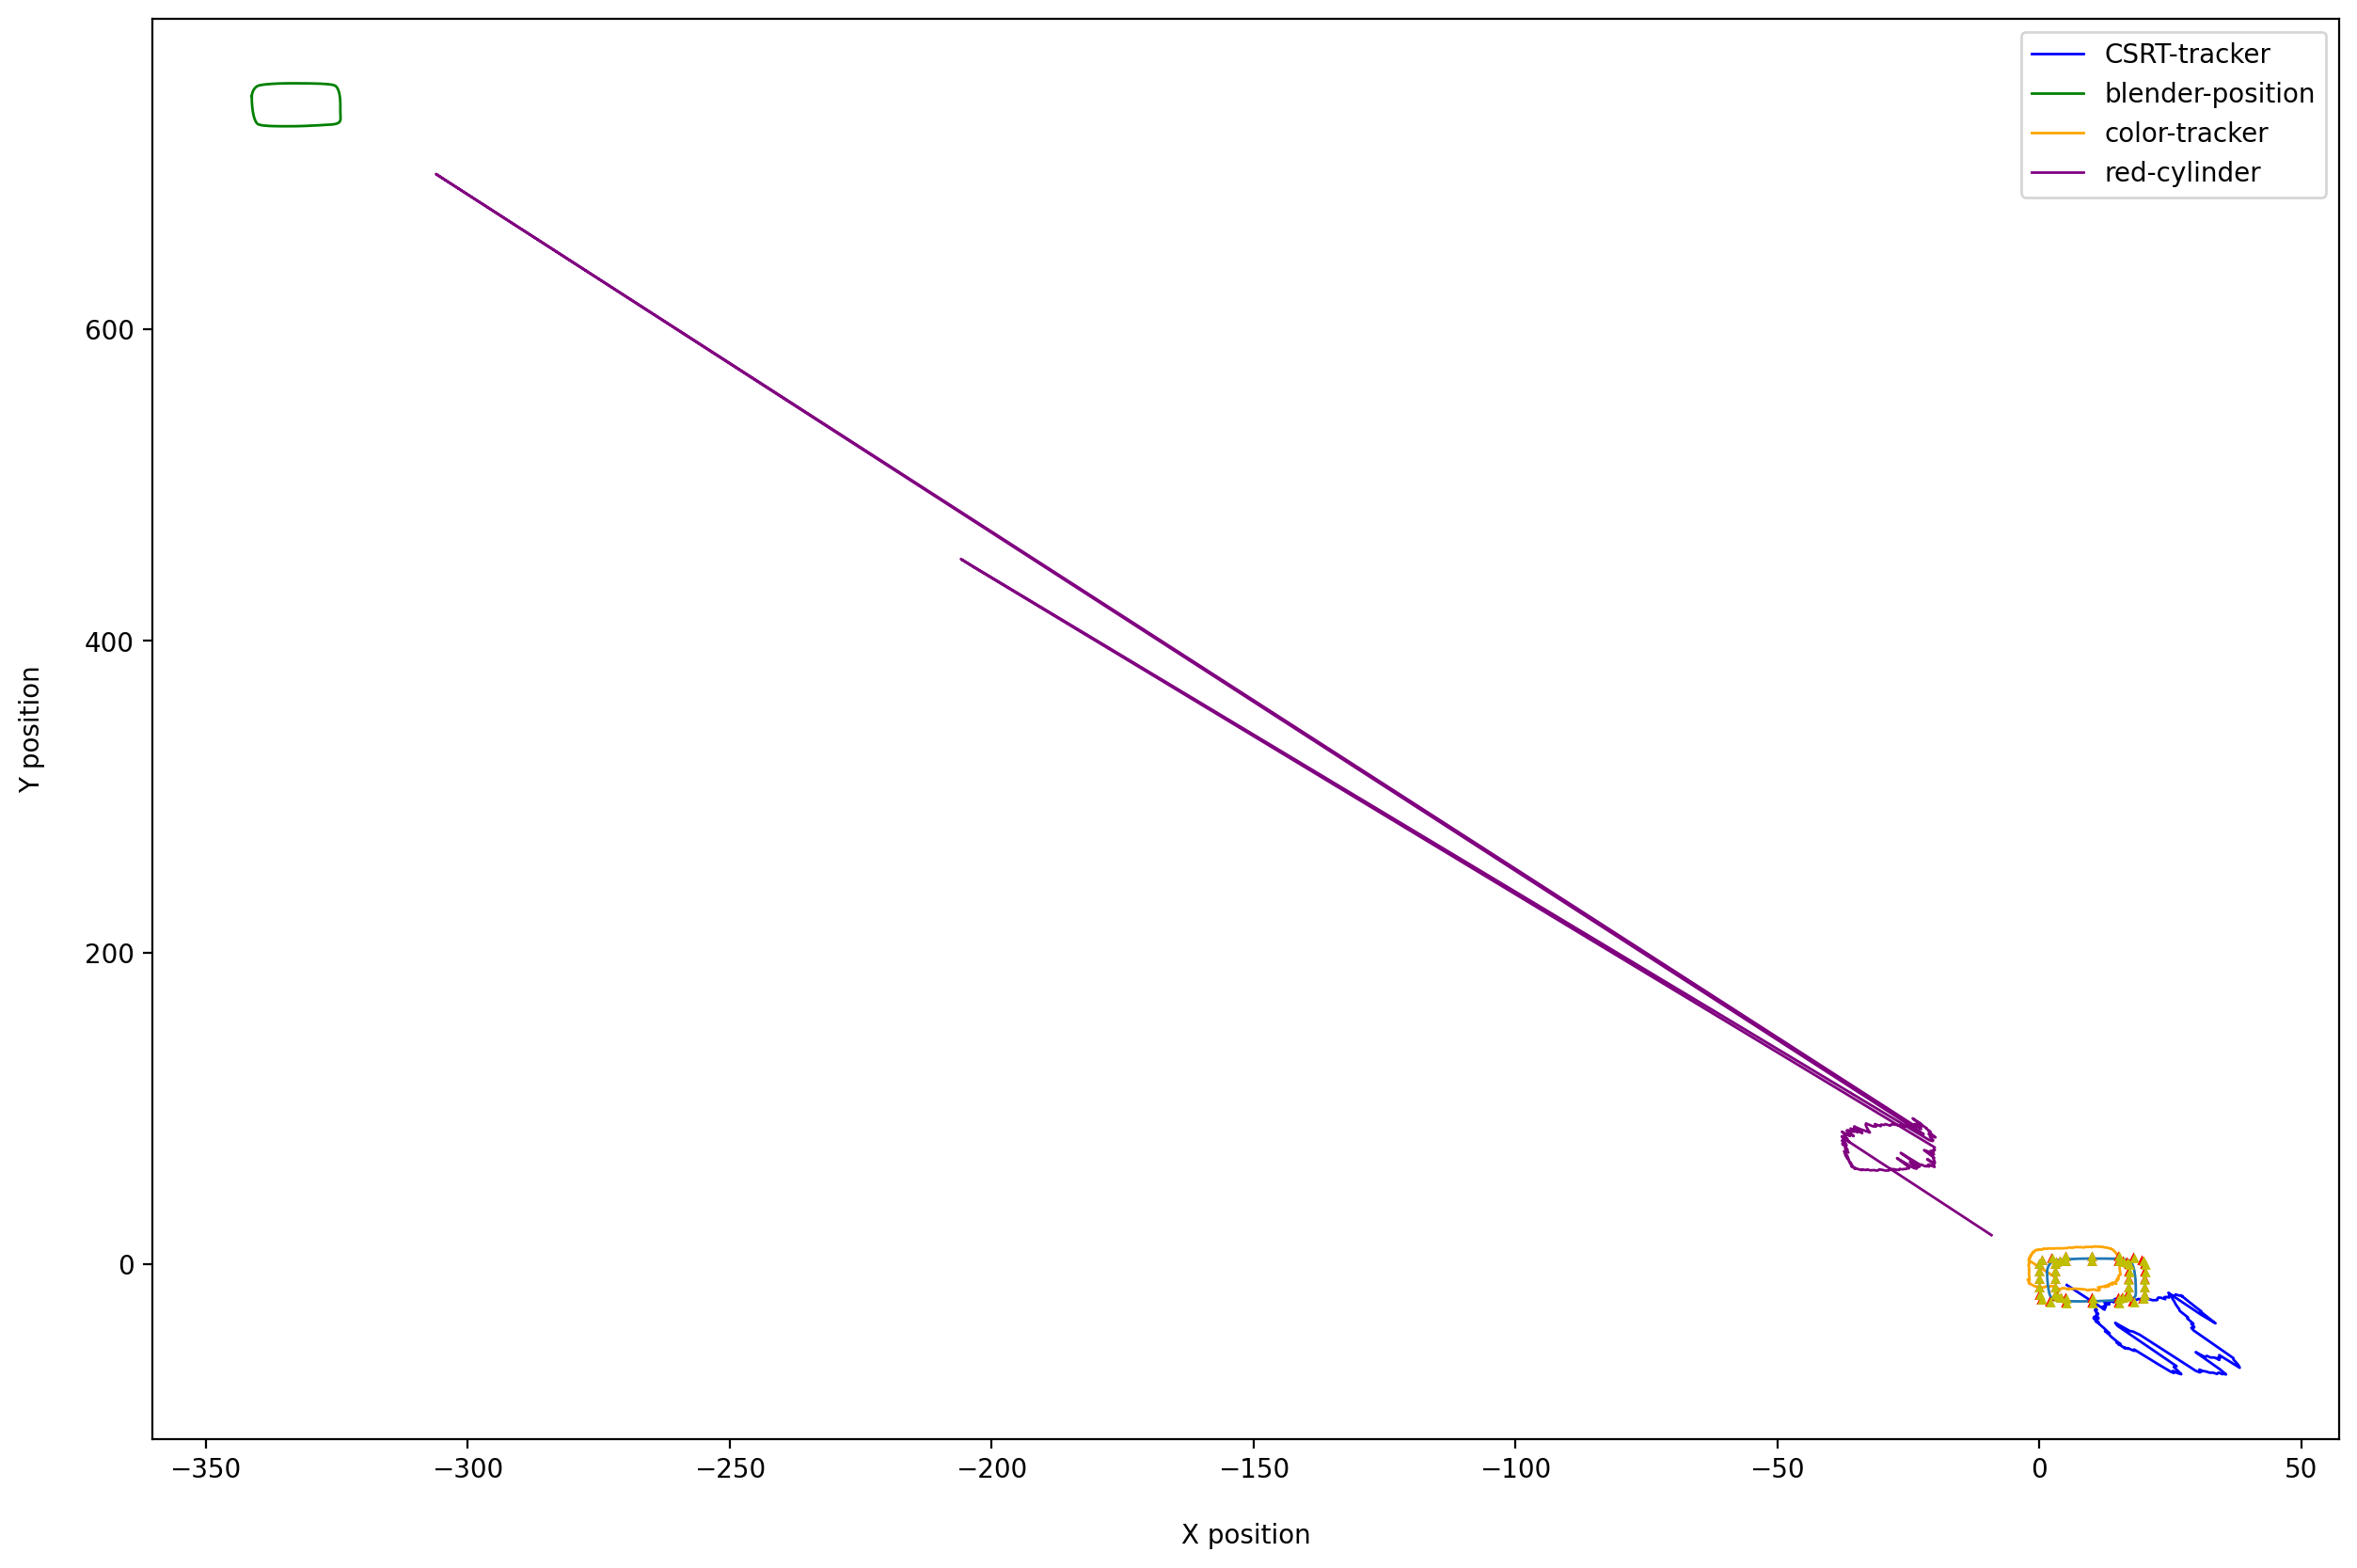

In [40]:
# Plot initial results
plotTrack(results)